# System Idenfication of the VESC

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sysidentpy.metrics import mean_squared_error
import matplotlib.pyplot as plt

/tmp/ipykernel_5641/1409735019.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('./mnt/2023-11-12_15-17-10_P=0.0008, 1k-10k.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6747 entries, 0 to 6746
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ms_today                  6747 non-null   int64  
 1   input_voltage             6747 non-null   float64
 2   temp_mos_max              6747 non-null   float64
 3   temp_mos_1                6747 non-null   int64  
 4   temp_mos_2                6747 non-null   int64  
 5   temp_mos_3                6747 non-null   int64  
 6   temp_motor                6747 non-null   float64
 7   current_motor             6747 non-null   float64
 8   current_in                6747 non-null   float64
 9   d_axis_current            6747 non-null   float64
 10  q_axis_current            6747 non-null   float64
 11  erpm                      6747 non-null   int64  
 12  duty_cycle                6747 non-null   float64
 13  amp_hours_used            6747 non-null   float64
 14  amp_hour

In [3]:
data_erpm = data[['ms_today', 'erpm']]
data_erpm.head()

,ms_today,erpm
0,26230302,0
1,26230323,0
2,26230345,0
3,26230366,0
4,26230388,0


In [4]:
f = lambda x:x-data_erpm['ms_today'][0]
data_erpm['ms_today'] = data_erpm['ms_today'].apply(f)
data_erpm.describe()

/tmp/ipykernel_5641/1135711610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_erpm['ms_today'] = data_erpm['ms_today'].apply(f)


,ms_today,erpm
count,6747.000000,6747.000000
mean,72342.940863,1791.036905
std,41799.730649,2492.754161
min,0.000000,-149.000000
25%,36146.500000,0.000000
50%,72303.000000,399.000000
75%,108514.500000,3151.000000
max,144756.000000,8840.000000


In [5]:
data_erpm.head()

,ms_today,erpm
0,0,0
1,21,0
2,43,0
3,64,0
4,86,0


<Axes: xlabel='ms_today'>

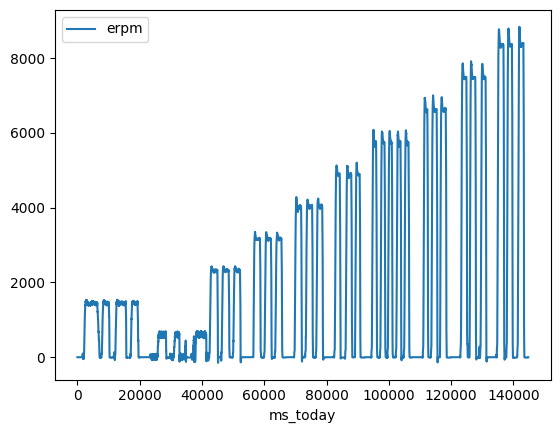

In [6]:
data_erpm.plot('ms_today', 'erpm')

In [7]:
def plot_data(x_lower_bound, x_upper_bound, y_upper_bound):
    fig, ax = plt.subplots(figsize = [16,8])
    ax.plot(data_erpm['ms_today'].to_numpy(), data_erpm['erpm'].to_numpy())
    ax.set_xlabel('Time [ms]')
    ax.set_ylabel('RPM')
    ax.set_xlim(xmin=x_lower_bound,  xmax=x_upper_bound)
    ax.set_ylim(ymin=-500,  ymax=y_upper_bound+500)

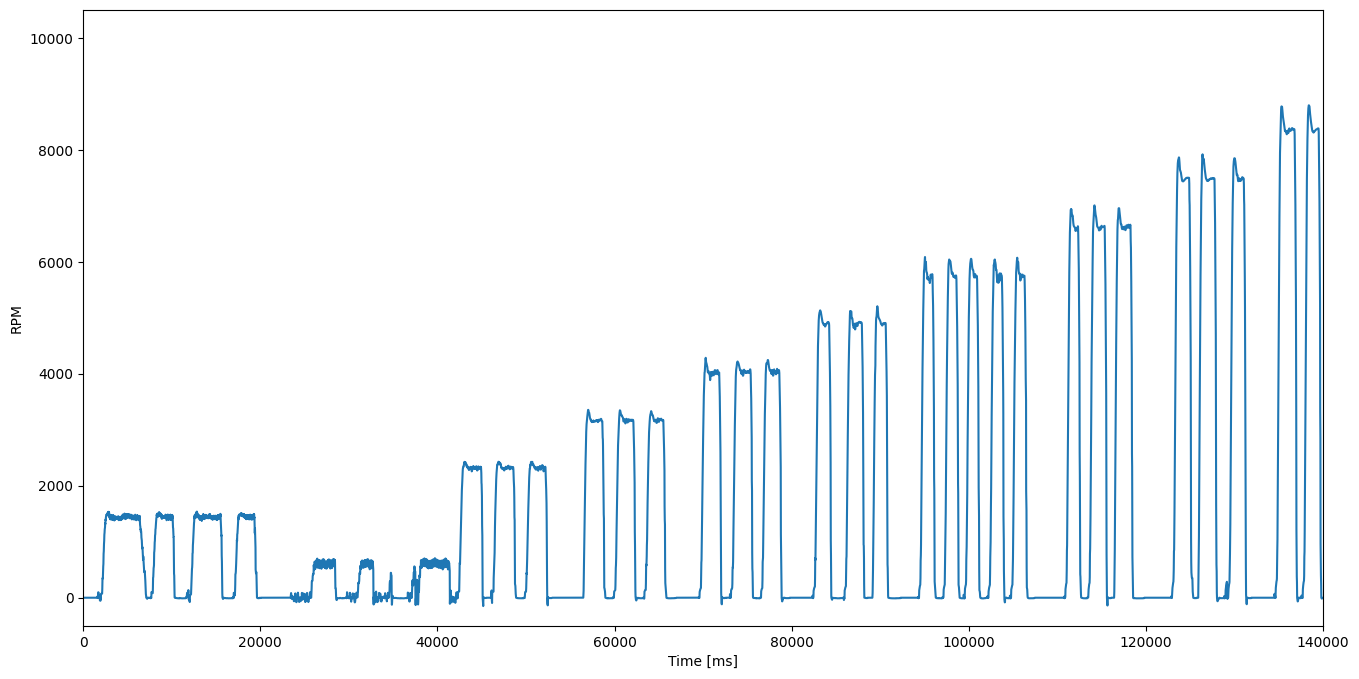

In [8]:
plot_data(0,140000,10000)

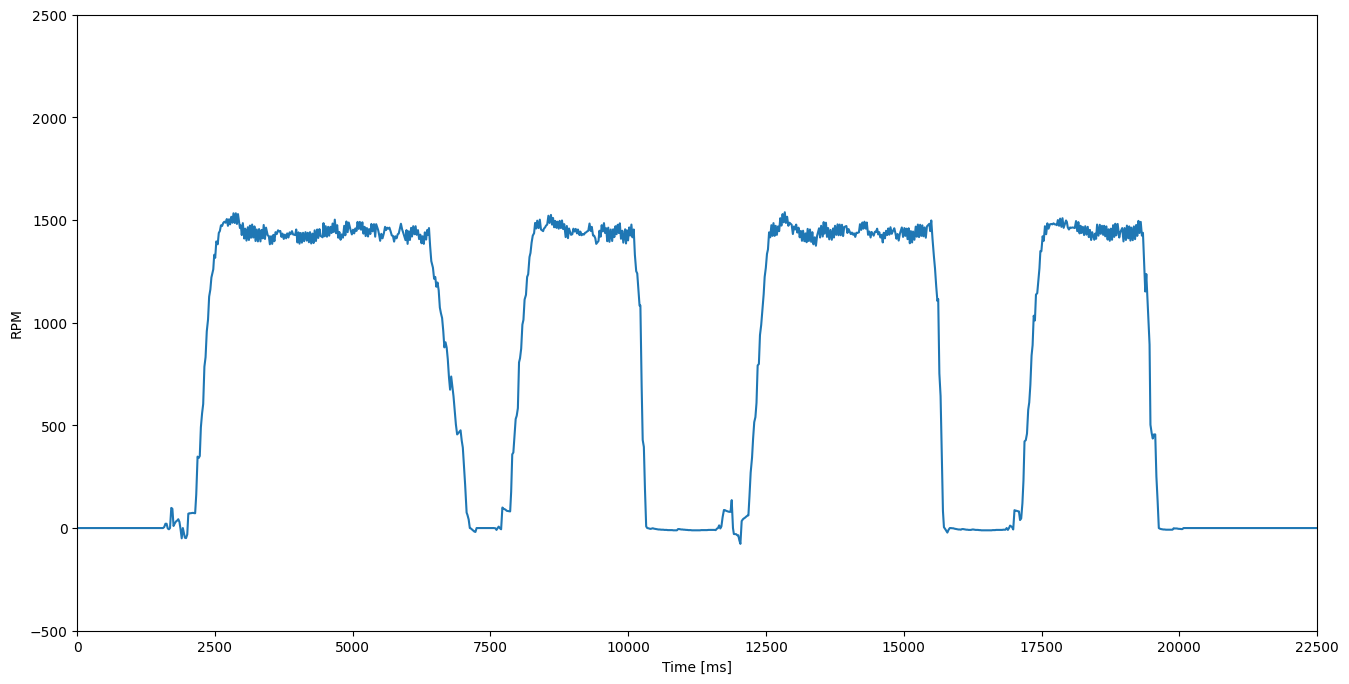

In [9]:
plot_data(x_lower_bound=0,x_upper_bound=22500,y_upper_bound=2000)

In [10]:
def row_subset(df, time_lower_bound, time_upper_bound):
    _ = df[df['ms_today'] <time_upper_bound][df['ms_today']>time_lower_bound]
    _ = _.reset_index()
    _ = _.drop('index', axis=1)
    _.plot('ms_today', 'erpm')
    return _

/tmp/ipykernel_5641/3470337457.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _ = df[df['ms_today'] <time_upper_bound][df['ms_today']>time_lower_bound]


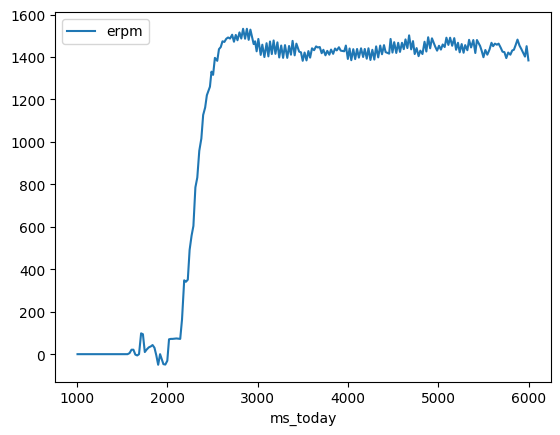

In [11]:
set_1 = row_subset(data_erpm, 1000, 6000)

In [12]:
for i, val in enumerate(set_1['erpm']>0):
    if abs(val):
        print(f"index: {i}")
        print(f"RPM: {set_1['erpm'][i]}")
        print(f"Time, ms: {set_1['ms_today'][i]}")
        break

index: 27
RPM: 5
Time, ms: 1580


/tmp/ipykernel_5641/3470337457.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _ = df[df['ms_today'] <time_upper_bound][df['ms_today']>time_lower_bound]


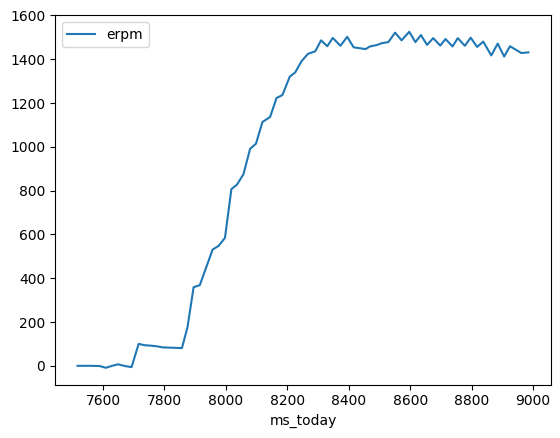

In [13]:
set_2 = row_subset(data_erpm, 7500, 9000)

/tmp/ipykernel_5641/3470337457.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _ = df[df['ms_today'] <time_upper_bound][df['ms_today']>time_lower_bound]


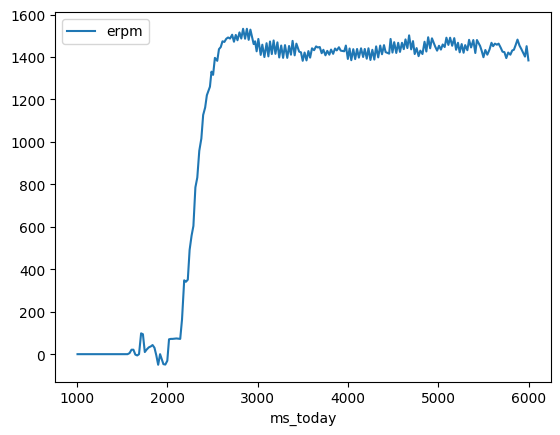

In [14]:
set_3 = row_subset(data_erpm, 1000, 6000)

/tmp/ipykernel_5641/3470337457.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _ = df[df['ms_today'] <time_upper_bound][df['ms_today']>time_lower_bound]


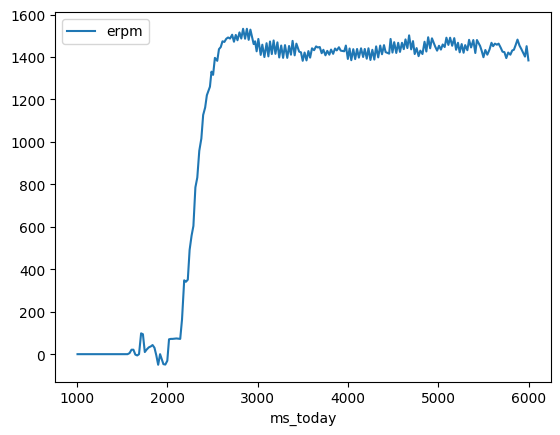

In [15]:
set_4 = row_subset(data_erpm, 1000, 6000)

In [16]:
# Generate a dataset of a simulated dynamical system
x_train, x_valid, y_train, y_valid = get_siso_data(
    n=1000,
    colored_noise=False,
    sigma=0.001,
    train_percentage=80
)

NameError: name 'get_siso_data' is not defined